In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import exp
import regression as r
import numpy as np

In [2]:
df = exp.get_wp_energy_data()
df.head()

,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,wp_RNET,...,wp_bnd3,wp_bnd7,wp_evi,wp_lswi2,wp_ndvi,wp_LST.day,wp_LST.night,LW_IN.wp,LW_IN.si,LW_IN
0,7.33,0.808731,19.179167,195,0.0,22.320833,30.3156,4.958333,2012,20.798342,...,0.029934,0.112914,0.335343,0.354057,6052.592985,31.567899,17.204530,29.105844,24.562860,29.105844
1,6.52,0.755945,19.325000,196,0.0,21.770833,29.6316,3.791667,2012,20.573593,...,0.029932,0.112904,0.335286,0.354033,6178.213349,29.570000,17.390000,29.760736,26.096551,29.760736
2,6.92,0.858993,20.262500,197,0.0,21.908333,29.3472,4.137500,2012,20.475931,...,0.029930,0.112893,0.335229,0.354008,6313.892022,31.097908,17.235624,30.299442,25.986418,30.299442
3,6.35,0.477617,16.791667,198,0.0,22.420833,28.8180,6.033333,2012,20.571045,...,0.029928,0.112882,0.335173,0.353984,6459.629005,30.868718,17.248525,28.978868,25.122209,28.978868
4,5.13,0.556820,17.016667,199,0.0,21.529167,23.1732,4.350000,2012,16.757401,...,0.029926,0.112872,0.335116,0.353960,6615.424298,30.657792,17.259663,30.653667,27.830367,30.653667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 28 columns):
PET             1028 non-null float64
VPD             1028 non-null float64
air_temp        1028 non-null float64
doy             1028 non-null int64
precip          1028 non-null float64
soil_temp       1028 non-null float64
sw_in           1028 non-null float64
wind_speed      1028 non-null float64
year            1028 non-null int64
wp_RNET         1028 non-null float64
wp_ch4_gf       1028 non-null float64
wp_co2_gf       1028 non-null float64
wp_er           1028 non-null float64
wp_gpp          1028 non-null float64
wp_h            1028 non-null float64
wp_le           1028 non-null float64
wp_bnd1         1028 non-null float64
wp_bnd2         1028 non-null float64
wp_bnd3         1028 non-null float64
wp_bnd7         1028 non-null float64
wp_evi          1028 non-null float64
wp_lswi2        1028 non-null float64
wp_ndvi         1028 non-null float64
wp_LST.day      1028 no

In [4]:
X_cols = ["precip", "sw_in", "LW_IN.wp", "VPD", "air_temp", "PET", "wind_speed",
                  "wp_LST.day", "wp_LST.night", "wp_evi", "wp_ndvi", "wp_lswi2"]
Y_cols = ["wp_er"]
X, Y = exp.featurize(df, X_cols, Y_cols)
X_train, X_test, Y_train, Y_test = r.get_train_test_split(X, Y, test_size=0.33)
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(688, 12) (688,) (340, 12) (340,)


R2-score:  0.925518643252


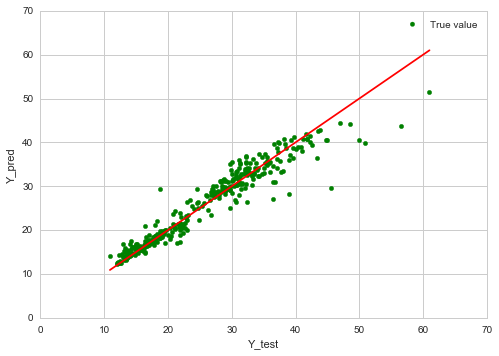

In [5]:
Y_pred = r.predict(r.random_forests(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.926002289061


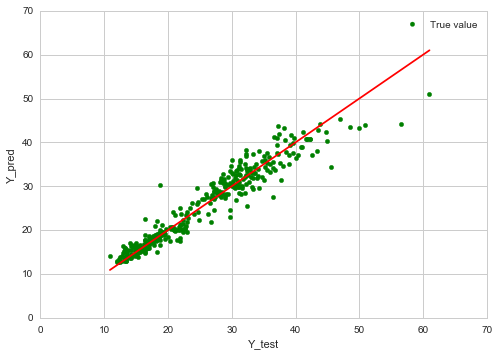

In [6]:
Y_pred = r.predict(r.xgb_trees(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.839624023435


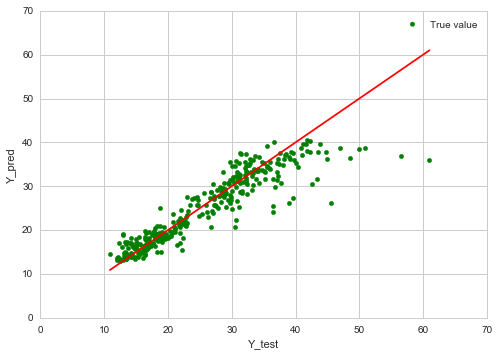

In [7]:
Y_pred = r.predict(r.svm(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

Step #1, avg. loss: 745.78046
Step #501, epoch #71, avg. loss: 22.42093
Step #1001, epoch #143, avg. loss: 5.83763
Step #1501, epoch #214, avg. loss: 3.64799
Step #2001, epoch #285, avg. loss: 2.68992
Step #2501, epoch #357, avg. loss: 2.17794
Step #3001, epoch #428, avg. loss: 1.86980
Step #3501, epoch #500, avg. loss: 1.68652
Step #4001, epoch #571, avg. loss: 1.57326
Step #4501, epoch #643, avg. loss: 1.49834
R2-score:  0.853230870564


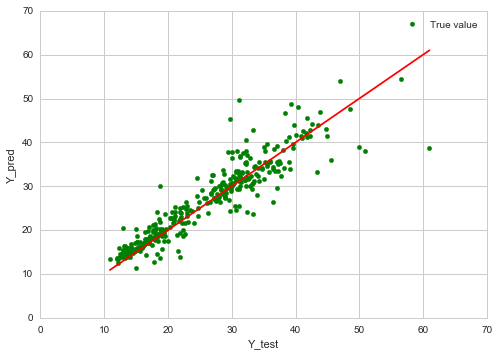

In [8]:
Y_pred = r.predict(r.dnn(nn_steps=5000), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)